2024-07-24 22:49:27.911080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 22:49:28.513753: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 22:49:28.515821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 22:49:29.597533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/charles/miniconda3/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Pleas

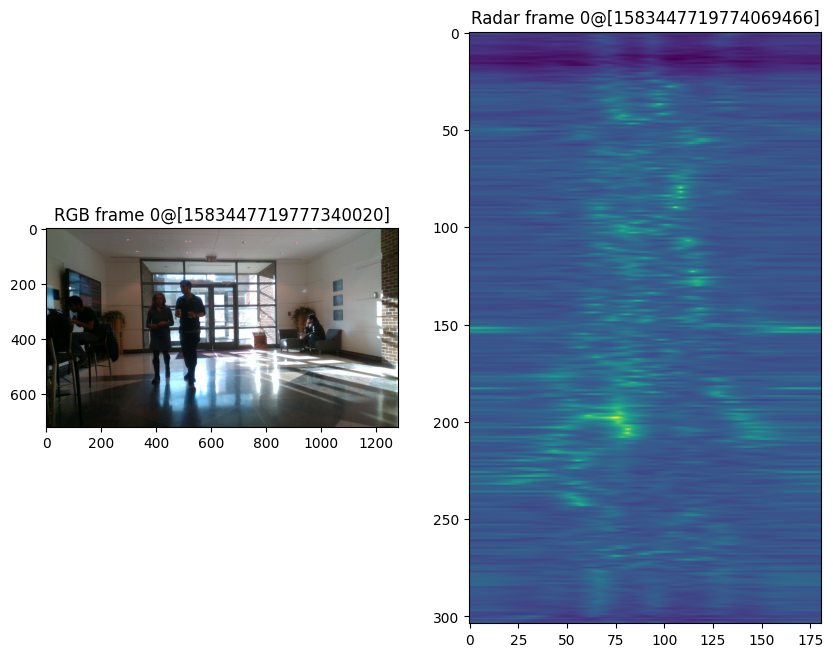

(32, 8, 304)


In [1]:
import matplotlib.pyplot as plt  
import numpy as np  

plt.rcParams['figure.figsize'] = [10, 20]  

from radicalsdk.h5dataset import H5DatasetLoader  
from radicalsdk.radar.config_v1 import read_radar_params  
from radicalsdk.radar.v1 import RadarFrame  
from radicalsdk.geometry import PolarToCartesianWarp  

# Load the dataset  
data = H5DatasetLoader('./samples/indoor_sample_50.h5')  

# Read radar configuration  
radar_config = read_radar_params('./samples/indoor_human_rcs.cfg')  
rf = RadarFrame(radar_config)  

# print(rf.bins_processed)        
# print(rf.virt_ant) # = self.cfg['numLanes'] * len(self.cfg['chirps']) #radar_cube.shape[1]
# print(rf.__doppler_bins)

# Set up the plot  
plt.ion()  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))  

for frame_idx in range(1):  
    # Update the RGB image plot  
    ax1.clear()  
    ax1.imshow(data['rgb'][frame_idx][..., ::-1])  
    ax1.set_title(f'RGB frame {frame_idx}@{data["rgb_timestamp"][frame_idx]}')  

    # Compute the radar frame  
    radar_frame = np.log(np.abs(rf.compute_range_azimuth(data['radar'][frame_idx])))  

    # Update the radar plot  
    ax2.clear()  
    ax2.imshow(radar_frame)  
    ax2.set_title(f'Radar frame {frame_idx}@{data["radar_timestamp"][frame_idx]}')  

    # Draw and pause to update the plots  
    plt.draw()  
    plt.pause(0.1)   
    
    
    # radar_cube
    print(data['radar'][frame_idx].shape)
    
    

# Keep the plot open after the loop ends  
plt.ioff()  
plt.show()

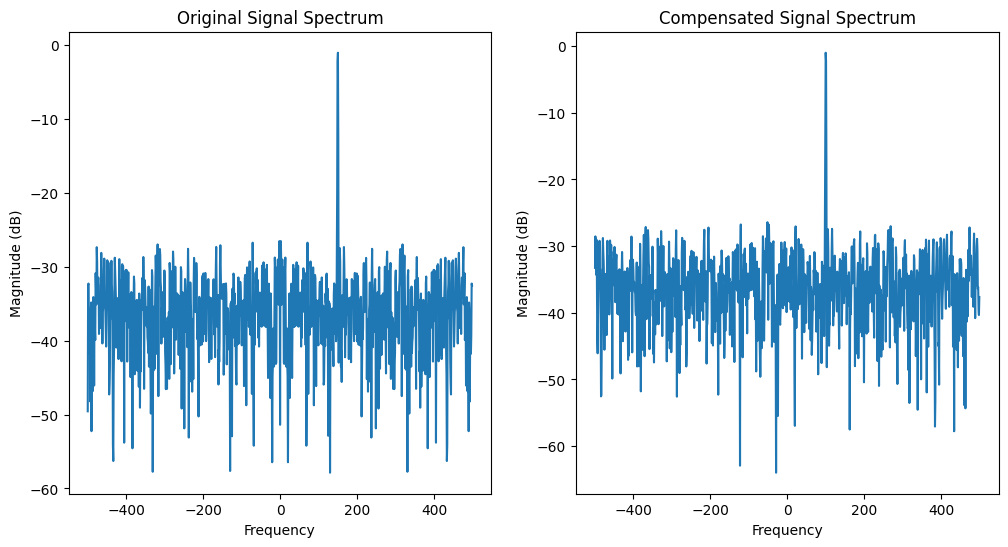

In [9]:
import numpy as np  
import matplotlib.pyplot as plt  

# 假设 fs 是采样频率，N 是采样点数，doppler_shift 是测得的多普勒频移  
fs = 1000  # 1 kHz  
N = 1024  # 1024 samples  
doppler_shift = 50  # 多普勒频移 50 Hz  

# 创建时间序列  
t = np.arange(N) / fs  

# 模拟接收到的信号（例如一个正弦信号加上多普勒频移）  
rx_signal = np.exp(1j * 2 * np.pi * (100 + doppler_shift) * t) + 0.5 * np.random.randn(N)  

# 计算补偿因子  
compensation_factor = np.exp(-1j * 2 * np.pi * doppler_shift * t)  

# 应用补偿因子  
compensated_signal = rx_signal * compensation_factor    

# 可视化处理结果  
plt.figure(figsize=(12, 6))  

# 原始信号的频谱  
plt.subplot(1, 2, 1)  
plt.magnitude_spectrum(rx_signal, Fs=fs, scale='dB')  
plt.title('Original Signal Spectrum')  

# 补偿后的信号频谱  
plt.subplot(1, 2, 2)  
plt.magnitude_spectrum(compensated_signal, Fs=fs, scale='dB')  
plt.title('Compensated Signal Spectrum')  

plt.show()